In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

05/18/2020 14:20:23 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/18/2020 14:20:24 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/18/2020 14:20:24 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/18/2020 14:20:25 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/18/2020 14:20:26 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

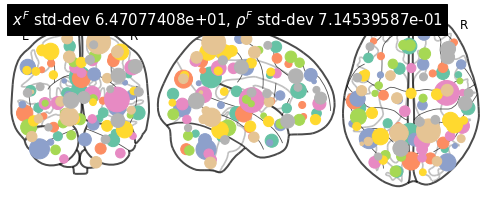

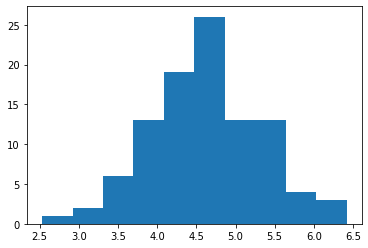

(<nilearn.plotting.displays.OrthoProjector at 0x7fa036269650>,
 tensor([[-52.1566, -24.6377,  15.5718],
         [ 36.5555, -67.7492, -28.9256],
         [ 50.9231,  10.2611,  32.5525],
         [ 24.2341,  59.4905,  -7.5001],
         [ -0.3982, -51.6204,  30.2055],
         [-43.7961,  28.1059,  -2.2215],
         [-23.5153, -40.6227, -32.2557],
         [-11.0402,  16.8571,  62.4670],
         [ 60.9760, -24.4837,  -7.6770],
         [ 20.1030, -47.3492, -13.4810],
         [ -0.9981,  40.5503,  16.2885],
         [-13.5284, -91.5058,  12.7728],
         [ 34.6067,  12.2984, -36.3948],
         [-27.9141, -11.1375, -22.7499],
         [ 34.8801, -61.2960,  47.0657],
         [-40.4102, -60.3015,  37.6429],
         [ 46.2509,  44.3753,   1.2134],
         [ 23.8767,  11.7793,   5.0894],
         [ 21.5282, -77.6068, -45.2791],
         [-38.2637,  45.7855, -11.0115],
         [-58.3878, -17.1211,  -8.0803],
         [ 34.6697,  17.8623,  50.2927],
         [-12.0560, -43.1158,  69.6

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

552

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100,
                    blocks_filter=haxby_db.inference_filter(training=True))

05/18/2020 14:21:43 [Epoch 1] (7535ms) Posterior free-energy 1.09553449e+10 = KL from prior 6.06456250e+05 - log-likelihood -1.09547387e+10
05/18/2020 14:21:43 Saving checkpoint...
05/18/2020 14:21:50 [Epoch 2] (7424ms) Posterior free-energy 1.03059282e+10 = KL from prior 4.63361094e+05 - log-likelihood -1.03054643e+10
05/18/2020 14:21:57 [Epoch 3] (7340ms) Posterior free-energy 9.90178509e+09 = KL from prior 3.54004031e+05 - log-likelihood -9.90143181e+09
05/18/2020 14:22:05 [Epoch 4] (7336ms) Posterior free-energy 9.62876109e+09 = KL from prior 3.22619031e+05 - log-likelihood -9.62844058e+09
05/18/2020 14:22:12 [Epoch 5] (7309ms) Posterior free-energy 9.43609344e+09 = KL from prior 3.14441062e+05 - log-likelihood -9.43577805e+09
05/18/2020 14:22:19 [Epoch 6] (7323ms) Posterior free-energy 9.31610522e+09 = KL from prior 3.05905656e+05 - log-likelihood -9.31579904e+09
05/18/2020 14:22:27 [Epoch 7] (7331ms) Posterior free-energy 9.22233037e+09 = KL from prior 2.90447219e+05 - log-likeli

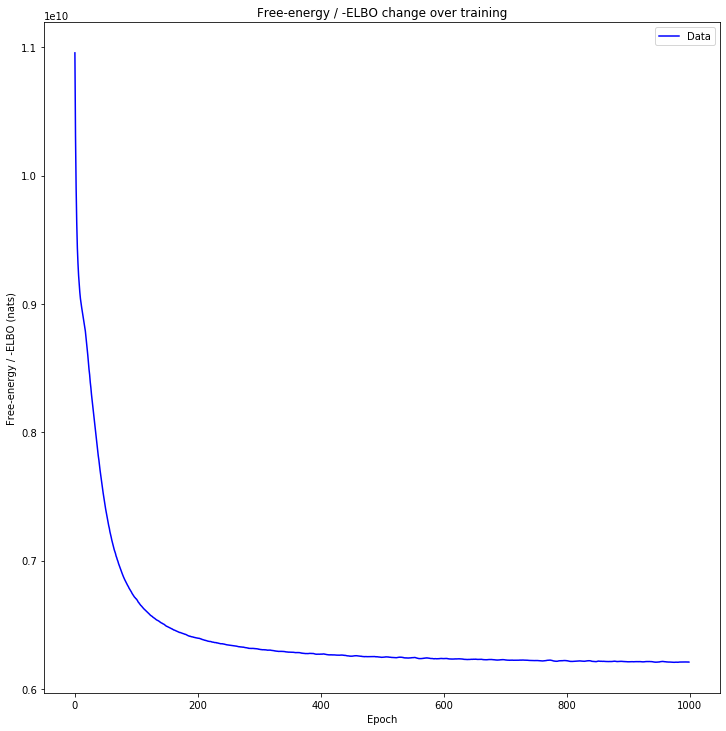

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100,
                    train_globals=False, blocks_filter=haxby_db.inference_filter(training=False))

05/18/2020 16:23:21 [Epoch 1] (840ms) Posterior free-energy 1.62434381e+09 = KL from prior 1.22318445e+05 - log-likelihood -1.62422131e+09
05/18/2020 16:23:21 Saving checkpoint...
05/18/2020 16:23:22 [Epoch 2] (850ms) Posterior free-energy 1.58972915e+09 = KL from prior 1.20139562e+05 - log-likelihood -1.58960896e+09
05/18/2020 16:23:22 [Epoch 3] (848ms) Posterior free-energy 1.59093517e+09 = KL from prior 1.20381469e+05 - log-likelihood -1.59081472e+09
05/18/2020 16:23:23 [Epoch 4] (847ms) Posterior free-energy 1.56849933e+09 = KL from prior 1.20214695e+05 - log-likelihood -1.56837901e+09
05/18/2020 16:23:24 [Epoch 5] (843ms) Posterior free-energy 1.55707008e+09 = KL from prior 1.19917227e+05 - log-likelihood -1.55695027e+09
05/18/2020 16:23:25 [Epoch 6] (840ms) Posterior free-energy 1.54451482e+09 = KL from prior 1.18837734e+05 - log-likelihood -1.54439590e+09
05/18/2020 16:23:26 [Epoch 7] (838ms) Posterior free-energy 1.52737664e+09 = KL from prior 1.18477453e+05 - log-likelihood -1

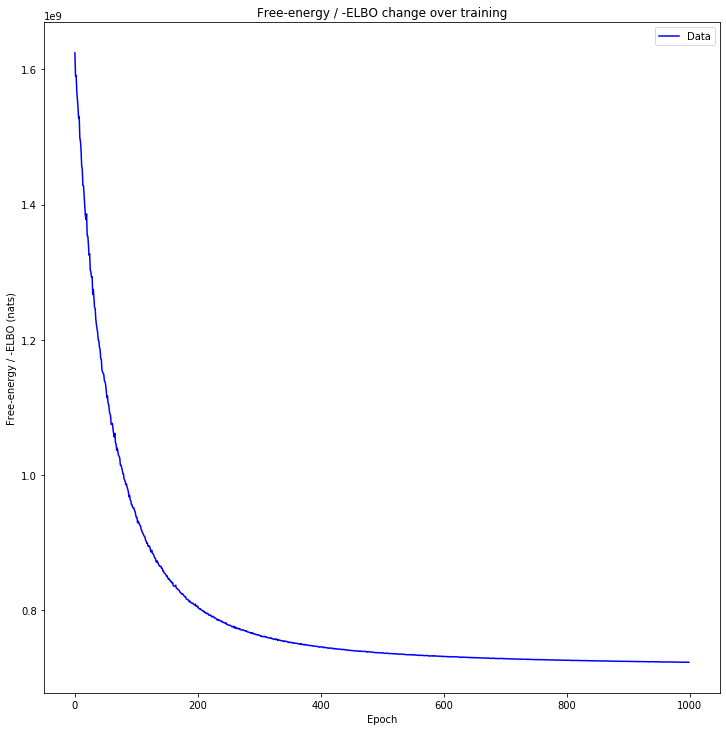

In [13]:
utils.plot_losses(losses)

In [14]:
def task_labeler(task):
    
    return task


def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


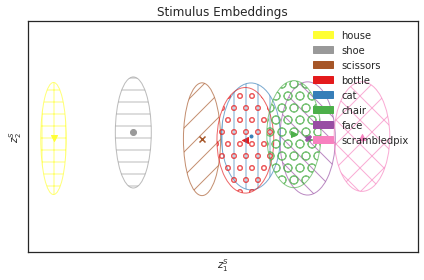

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [16]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


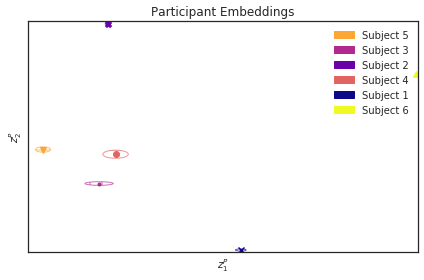

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [18]:
def block_task_labeler(b):
    task = b.task
    return task


05/18/2020 16:37:31 Plotting factors for Participant 6, run 2


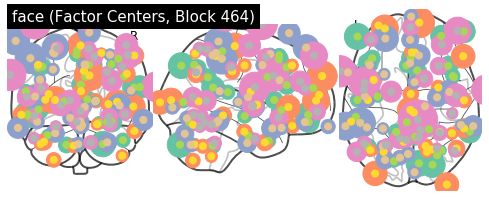

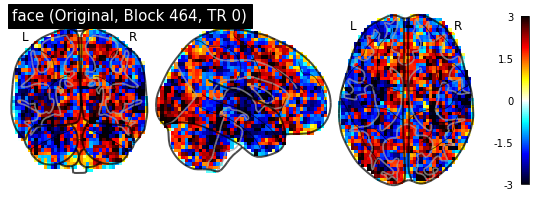

05/18/2020 16:37:33 Reconstruction Error (Frobenius Norm): 1.30633194e+02 out of 6.17531311e+02


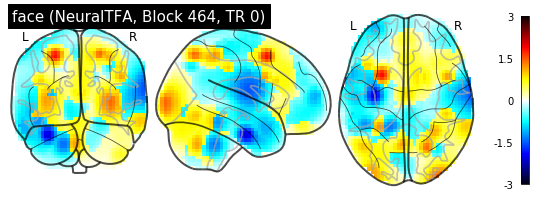

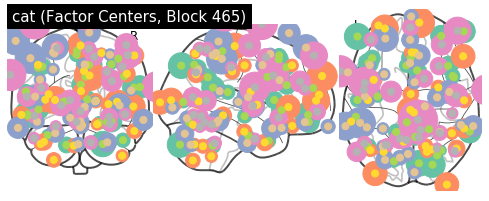

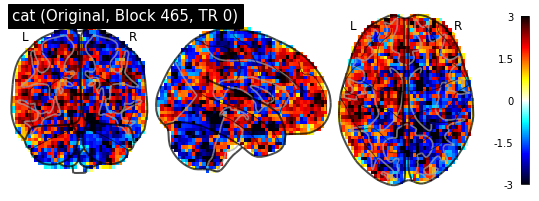

05/18/2020 16:37:36 Reconstruction Error (Frobenius Norm): 1.37199127e+02 out of 5.65591675e+02


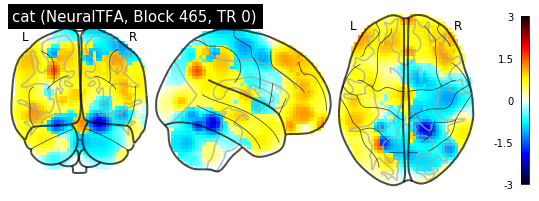

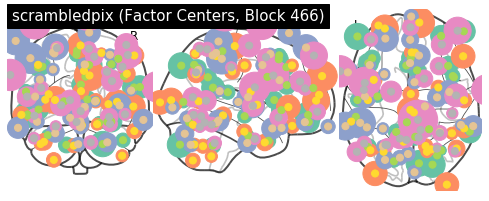

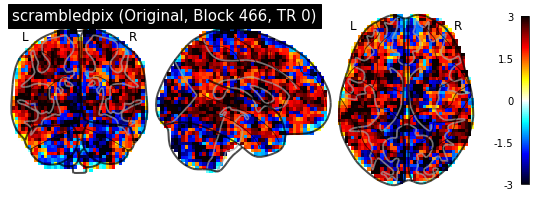

05/18/2020 16:37:39 Reconstruction Error (Frobenius Norm): 1.36087646e+02 out of 5.95898987e+02


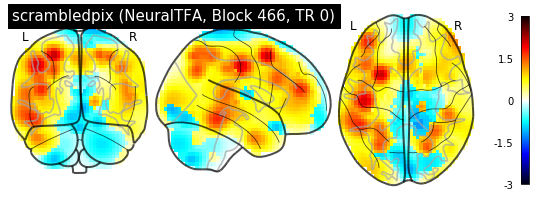

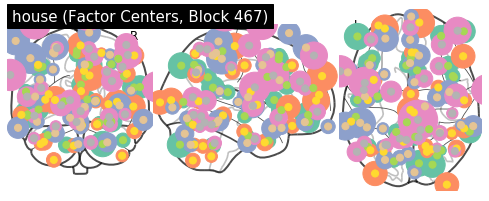

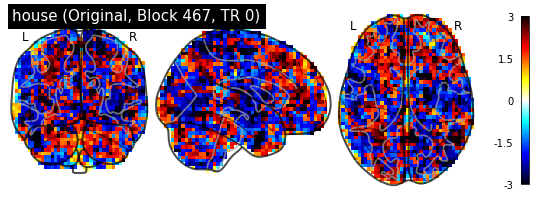

05/18/2020 16:37:42 Reconstruction Error (Frobenius Norm): 1.40066406e+02 out of 5.83926453e+02


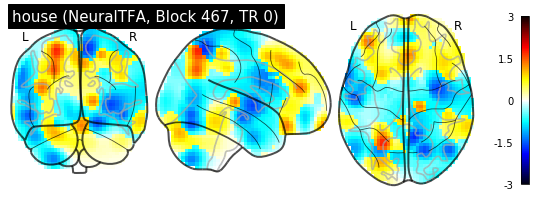

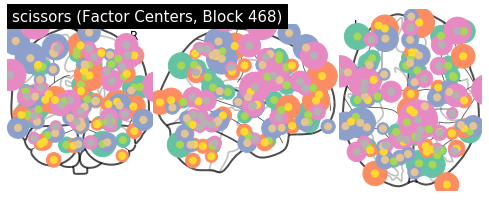

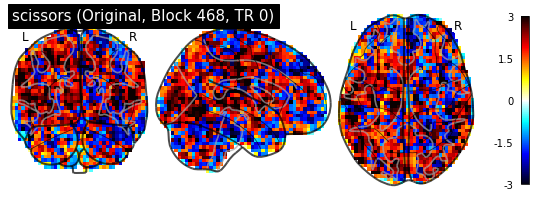

05/18/2020 16:37:45 Reconstruction Error (Frobenius Norm): 1.16185867e+02 out of 5.95642212e+02


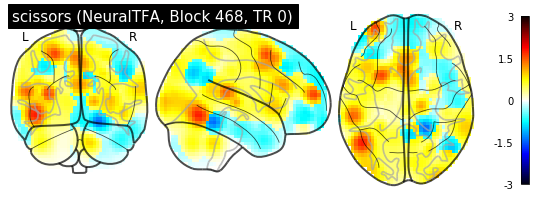

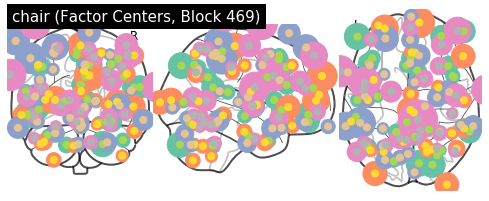

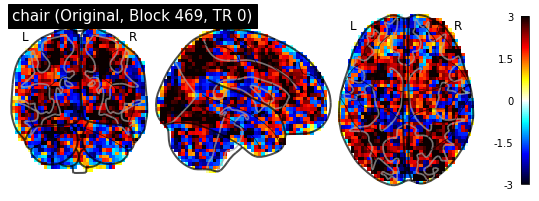

05/18/2020 16:37:48 Reconstruction Error (Frobenius Norm): 1.17938858e+02 out of 6.16451965e+02


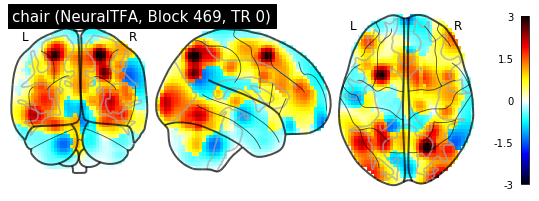

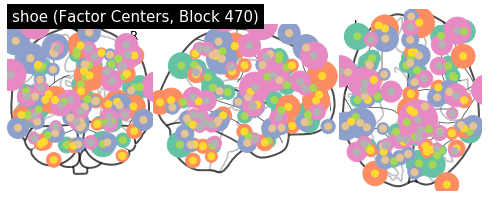

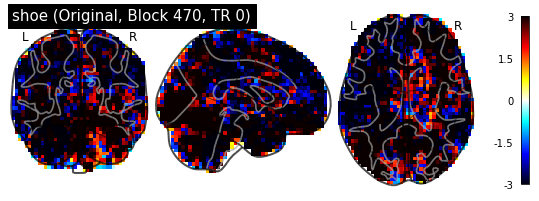

05/18/2020 16:37:51 Reconstruction Error (Frobenius Norm): 1.58112518e+02 out of 6.86945862e+02


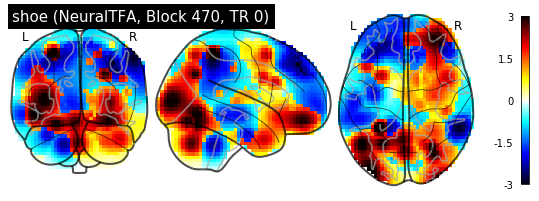

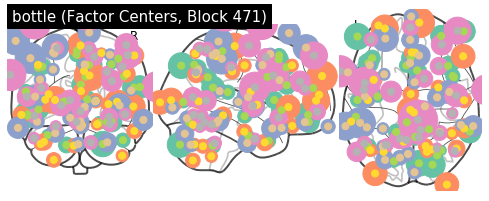

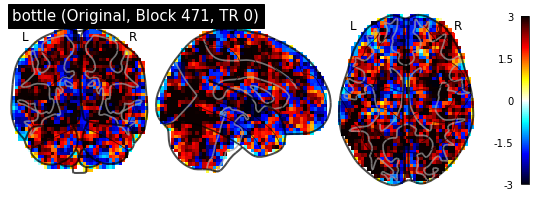

05/18/2020 16:37:54 Reconstruction Error (Frobenius Norm): 1.48652908e+02 out of 6.49640137e+02


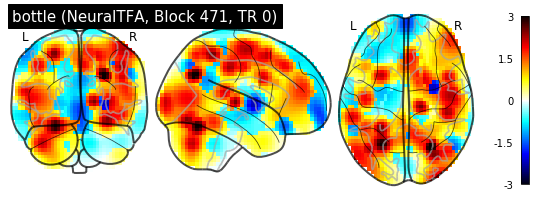

In [19]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

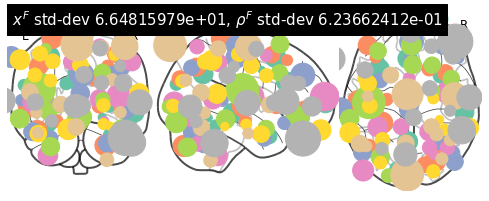

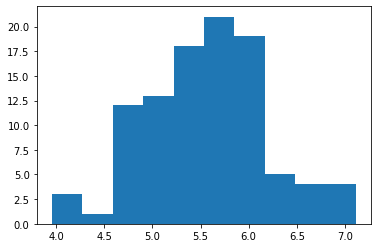

(<nilearn.plotting.displays.OrthoProjector at 0x7fa004149f50>,
 tensor([[-5.9204e+01, -2.7858e+01,  2.1428e+01],
         [ 3.8497e+01, -5.8334e+01, -2.4375e+01],
         [ 4.4122e+01,  1.8804e+00,  3.7966e+01],
         [ 3.0090e+01,  6.8910e+01,  2.8678e+00],
         [-2.4335e+00, -5.9858e+01,  3.4022e+01],
         [-3.2243e+01,  2.4365e+01,  4.4979e+00],
         [-3.1428e+01, -4.6985e+01, -2.0748e+01],
         [-3.2589e+01,  1.6096e+01,  5.1618e+01],
         [ 5.7029e+01, -2.8967e+01, -7.3295e+00],
         [ 2.3169e+01, -5.4462e+01, -1.2367e+01],
         [-2.4742e+00,  2.7378e+01,  2.5825e+01],
         [-1.4727e+01, -8.8116e+01,  2.3048e+01],
         [ 3.2511e+01,  9.6549e+00, -3.1495e+01],
         [-2.4417e+01, -1.5545e+01, -1.6390e+01],
         [ 2.8959e+01, -6.4304e+01,  4.1385e+01],
         [-4.3982e+01, -6.6917e+01,  4.0965e+01],
         [ 4.2373e+01,  4.5850e+01, -1.5287e+00],
         [ 2.0265e+01,  1.6922e+01, -1.1500e-01],
         [ 2.6521e+01, -8.0386e+01, -

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error()

05/18/2020 16:38:08 Average reconstruction error (MSE): 9.44132717e-01
05/18/2020 16:38:08 Average data norm (Euclidean): 1.12463532e+00
05/18/2020 16:38:08 Percent average reconstruction error: 0.472386


(0.9441327173003488, 1.1246353234958897, 0.004723857535609292)

In [22]:
dtfa.average_reconstruction_error(weighted=False)

05/18/2020 16:38:20 Average reconstruction error (MSE): 5.06998130e+02 +/- 3.92615599e+01
05/18/2020 16:38:20 Average data norm (Euclidean): 6.02641825e+02 +/- 6.11461646e+01
05/18/2020 16:38:20 Percent average reconstruction error: 84.369036 +/- 3.18995191e+00


(array([567.2208252 , 539.09118652, 503.34295654, 512.99987793,
        533.13891602, 513.2802124 , 517.9677124 , 490.24337769,
        562.09832764, 529.68664551, 503.29138184, 452.21774292,
        472.29055786, 490.12759399, 555.05804443, 544.36938477,
        503.68692017, 499.42428589, 472.29159546, 507.20907593,
        481.75384521, 539.22119141, 503.90551758, 515.85534668,
        621.04278564, 555.17871094, 514.28637695, 537.49737549,
        480.60076904, 517.31347656, 520.18310547, 480.27252197,
        594.29443359, 529.55480957, 471.61212158, 496.9543457 ,
        536.42163086, 497.14071655, 511.60037231, 542.8046875 ,
        606.36157227, 502.74185181, 501.27218628, 525.53283691,
        531.00012207, 510.03414917, 547.12445068, 493.07333374,
        525.46972656, 535.3079834 , 485.80883789, 458.70031738,
        509.22851562, 557.89129639, 521.26544189, 552.38140869,
        454.57089233, 451.89932251, 470.45663452, 448.44891357,
        464.55075073, 468.11914062, 434.